In [81]:
import pandas as pd
import numpy as np


In [82]:
# read and display first line of file
file_name = 'LLCP2021.ASC'
with open(file_name) as file:
    for line in file:
        print(line)
        break

01              0101192021     11002021000001                 11 121 02 01012             2         52010880312223 21122211221223  1222108                                    141        111278805 007204112222211333888      10920200112      10155520420320110123                                                                                                              2         22222111111153                                                                                                                                                                                                                                                                      1001                                                                                                                                                                                                                                                                                                                                                     

In [83]:
# file format is fixed width
len(line)

2073

Goal: predict if a person has diabetes (based on age, sex, BMI, etc)

* Had diabetes: column 129. 3 = no
* income level: column 193-194.
* BMI: 2000-2003
* age: column 1983-1984
* sex: column 69
* sex of respondent: 91

Note: For correct indexing in a range, it's starting value-1 to ending value. Example for BMI: 1999:2003.

In [84]:
# diabetes (no)
line[128]

'3'

In [85]:
# income level
line[192:194] # 05 means just 5 whch is 25,000 - 35,000

'05'

In [86]:
#bmi
int(line[1999:2003])/100

14.54

In [87]:
#age (11 means 70 to 74)
line[1982:1984]

'11'

In [88]:
#sex (1=male, 2=female)
line[90]

'2'

In [126]:
data_dic = {}
idx= 0 # counter
with open(file_name) as file:
    for line in file:
        #diabetes
        diabetes=line[128]
        if diabetes == '1':
            diabetes = 1 # previously was 'yes'
        elif diabetes in ['2', '3', '4']:
            diabetes = 0 # previously was 'no'
        else:
            diabetes = np.nan
        
        #income
        income = line[192:194]
        if income in ['77', '99', '  ']:
            income = np.nan
        else:
            income = int(income)
        
        # BMI
        bmi = line[1999:2003]
        if bmi == '    ':
            bmi = np.nan
        else: bmi = int(bmi)/100
            
        # age
        age = line[1982:1984]
        if age == '14':
            age = np.nan
        else:
            age = int(age)
        
        # sex
        sex = line[90]
        if sex=='1':
            sex='male'
        else:
            sex='female'
        
        #health
        health = line[100]
        if health in ['7','9',' ']:
            health = np.nan
        else:
            health = int(health)
            
        #smoking
        smoking = line[2008]
        if smoking == '9':
            smoking = np.nan
        else:
            smking = int(smoking)
        
        #drinks
        drinks = line[2016:2021]
        if drinks == '99900':
            drinks = np.nan
        else:
            drinks = int(drinks)
        
        #exercise
        exercise = line[112]
        if exercise in ['7', '9', ' ']:
            exercise = np.nan
        else:
            exercise = int(exercise)
            
        #blood pressure
        bp = line[113]
        if bp in ['7', '9', ' ']:
            bp = np.nan
        else:
            if bp == '1':
                bp = 'yes'
            elif bp in ['3', '2']:
                bp = 'no'
            elif bp == '4':
                bp = 'borderline'
        # education
        education = line[175]
        if education in ['9', ' ']:
            education = np.nan
        else:
            education = int(education)
        
        
        # dictionary
        data_dic[idx] = {'diabetes':diabetes,
                        'income':income,
                         'bmi':bmi,
                         'age':age,
                         'sex':sex,
                         'health':health,
                         'smoking':smoking,
                         'drinks':drinks,
                         'exercise':exercise,
                         'bp':bp,
                         'education':education,
                        }
        idx+=1

In [127]:
data_dic

{0: {'diabetes': 0,
  'income': 5,
  'bmi': 14.54,
  'age': 11,
  'sex': 'female',
  'health': 5,
  'smoking': '3',
  'drinks': 0,
  'exercise': 2,
  'bp': 'no',
  'education': 4},
 1: {'diabetes': 1,
  'income': nan,
  'bmi': nan,
  'age': 10,
  'sex': 'female',
  'health': 3,
  'smoking': '4',
  'drinks': 0,
  'exercise': 1,
  'bp': 'yes',
  'education': 6},
 2: {'diabetes': 1,
  'income': 3,
  'bmi': 28.29,
  'age': 11,
  'sex': 'female',
  'health': 2,
  'smoking': '4',
  'drinks': 0,
  'exercise': 2,
  'bp': 'yes',
  'education': 4},
 3: {'diabetes': 1,
  'income': 7,
  'bmi': 33.47,
  'age': 9,
  'sex': 'female',
  'health': 2,
  'smoking': '4',
  'drinks': 300,
  'exercise': 1,
  'bp': 'yes',
  'education': 4},
 4: {'diabetes': 1,
  'income': 4,
  'bmi': 28.73,
  'age': 12,
  'sex': 'male',
  'health': 5,
  'smoking': '4',
  'drinks': 0,
  'exercise': 1,
  'bp': 'borderline',
  'education': 3},
 5: {'diabetes': 0,
  'income': 6,
  'bmi': 24.37,
  'age': 13,
  'sex': 'male',
  'h

In [128]:
data = pd.DataFrame.from_dict(data_dic, orient='index')
data.head(5)

,diabetes,income,bmi,age,sex,health,smoking,drinks,exercise,bp,education
0,0.0,5.0,14.54,11.0,female,5.0,3,0.0,2.0,no,4.0
1,1.0,NaN,NaN,10.0,female,3.0,4,0.0,1.0,yes,6.0
2,1.0,3.0,28.29,11.0,female,2.0,4,0.0,2.0,yes,4.0
3,1.0,7.0,33.47,9.0,female,2.0,4,300.0,1.0,yes,4.0
4,1.0,4.0,28.73,12.0,male,5.0,4,0.0,1.0,borderline,3.0


In [129]:
# save data as csv file
data.to_csv('diabetes_hw2.csv', index=False)

In [130]:
data = pd.read_csv('diabetes_hw2.csv')
data.head(5)

,diabetes,income,bmi,age,sex,health,smoking,drinks,exercise,bp,education
0,0.0,5.0,14.54,11.0,female,5.0,3.0,0.0,2.0,no,4.0
1,1.0,NaN,NaN,10.0,female,3.0,4.0,0.0,1.0,yes,6.0
2,1.0,3.0,28.29,11.0,female,2.0,4.0,0.0,2.0,yes,4.0
3,1.0,7.0,33.47,9.0,female,2.0,4.0,300.0,1.0,yes,4.0
4,1.0,4.0,28.73,12.0,male,5.0,4.0,0.0,1.0,borderline,3.0


## Baseline model


In [95]:
# imports
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

In [131]:
# drop rows with missing values
data = data.loc[data.diabetes.notna()]

In [132]:
X = data.drop('diabetes', axis=1)
y = data.diabetes

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [134]:
len(y_train),len(y_test)

(328281, 109427)

In [141]:
numerical_features=['income', 'bmi', 'age', 'health', 'drinks', 'exercise', 'education']
categorical_features = ['sex', 'smoking', 'bp']

In [142]:
numerical_processor = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler())
])

categorical_processor = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder())
])

feature_processor = ColumnTransformer(transformers=[
    ('num_processor', numerical_processor, numerical_features),
    ('cat_processor', categorical_processor, categorical_features)
])

pipe = Pipeline(steps=[
    ('processor', feature_processor),
    ('clf', KNeighborsClassifier(n_neighbors=100))
])

In [143]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('processor',
                 ColumnTransformer(transformers=[('num_processor',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['income', 'bmi', 'age',
                                                   'health', 'drinks',
                                                   'exercise', 'education']),
                                                 ('cat_processor',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder())]),
                                                  ['sex', 'smoking', 'bp'])])),
                ('clf', KNeighborsClassifier(n_neighbors=100))])

In [144]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, ConfusionMatrixDisplay

In [145]:
y_test_pred = pipe.predict(X_test)

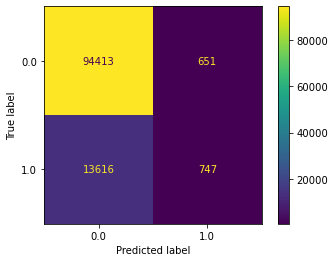

In [146]:
ConfusionMatrixDisplay.from_estimator(pipe,X_test,y_test)

In [147]:
recall_score(y_test,y_test_pred)

0.052008633293880106

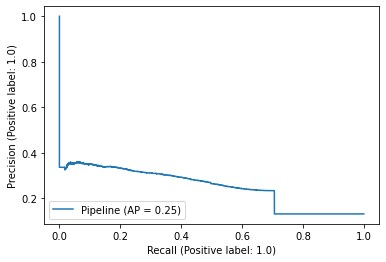

In [139]:
from sklearn.metrics import PrecisionRecallDisplay
best_pipe = grid.best_estimator_
PrecisionRecallDisplay.from_estimator(best_pipe,X_test,y_test)

## Improving the model
- Try logistic regression + polynomial features
- Grid search
- imbalanced data set
- add more features: alcohol, smoke, exericse, etc


In [137]:
# grid search for knn
param_dic = {'clf__n_neighbors':[5,10,20], 'clf__weights':['uniform', 'distance']}
grid = GridSearchCV(pipe, param_dic, cv=3, scoring='recall', n_jobs=-1)
grid.fit(X_train,y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('processor',
                                        ColumnTransformer(transformers=[('num_processor',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          MinMaxScaler())]),
                                                                         ['income',
                                                                          'bmi',
                                                                          'age',
                                                                          'health',
                                                                          'drinks',
                                                                          'exercise',
                                                                          'education']),
                                                                        ('cat_processor',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('encoder',
                                                                                          OneHotEncoder())]),
                                                                         ['sex',
                                                                          'smoking',
                                                                          'bp'])])),
                                       ('clf',
                                        KNeighborsClassifier(n_neighbors=100))]),
             n_jobs=-1,
             param_grid={'clf__n_neighbors': [5, 10, 20],
                         'clf__weights': ['uniform', 'distance']},
             scoring='recall')

In [140]:
# best parameters
grid.best_params_
# best classifier
#grid.best_estimator_

{'clf__n_neighbors': 5, 'clf__weights': 'distance'}

In [ ]:
# recall
y_test_pred = best_pipe.predict(X_test)
recall_score(y_test,y_test_pred)